In [1]:
import numpy as np
import pandas as pd
from functions import adjust, todf, sent_to_words, remove_stopwords, search_topic
%load_ext autoreload
%autoreload 2

from functions import adjust, todf, sent_to_words, remove_stopwords, search_topic, tonum
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thmartinelli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ler os dados de input

In [2]:
df = pd.read_excel('inputs.xlsm')

### Vamos aplicar algumas funções para ajustar os dados

In [3]:
df = df.iloc[:,0].apply(adjust)
df = todf(df)

### Teste de consistência

In [4]:
ii = []
for n,i in enumerate(df[5].values):
    try:
        float(i)
    except:
        ii.append(n)

In [5]:
df = df.reset_index().rename(columns = dict(zip(['index'] + list(range(df.shape[1])), ['name' ,'description','employees','total_funding','city','subcountry','lat','lng'])))

In [6]:
df

,name,description,employees,total_funding,city,subcountry,lat,lng
0,fitin,"""fitin is the latest fit tech platform that pr...",1.0,nan,toronto,ontario,43.700109999999995,-79.4163
1,quinditech,"""our services include independent & collaborat...",10.0,nan,montreal,quebec,45.50884,-73.58781
2,botfirst,"""chatlanding is a digital chatbot platform whe...",1.0,nan,toronto,ontario,43.700109999999995,-79.4163
3,bravver,ai-powered army of health professionals in you...,1.0,nan,quebec,quebec,46.8259601,-71.23522259999999
4,stylify,"""stylify is a mobile platform that connects pe...",1.0,nan,toronto,ontario,43.700109999999995,-79.4163
...,...,...,...,...,...,...,...,...
21138,eestor corporation,eestor corporation's (the â€œcompanyâ€) missi...,0.0,nan,toronto,ontario,43.70011,-79.4163
21139,colliers international,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21140,h2o innovation,"""h2o innovation is known for its state of the ...",50.0,nan,toronto,ontario,43.70011,-79.4163
21141,ovivo,"""ovivo is a world leader in equipment and solu...",500.0,nan,toronto,ontario,43.70011,-79.4163


In [7]:
df['total_funding'] = df['total_funding'].apply(lambda x: str(x).lower()).map({'nan':np.nan})

In [8]:
df['lat'] = df['lat'].apply(tonum)
df['lng'] = df['lng'].apply(tonum)
df['total_funding'] = df['total_funding'].apply(tonum)
df['employees'] = df['employees'].apply(tonum)

In [9]:
print('% de Nan')
(df.isna().sum() / df.shape[0]*100).apply(lambda x: f'{x:.2f}%')

% de Nan


name               0.00%
description        1.44%
employees          4.79%
total_funding    100.00%
city               1.44%
subcountry         2.23%
lat                4.80%
lng                4.80%
dtype: object

In [10]:
df.drop('total_funding', axis=1, inplace = True)

In [11]:
df = df.dropna()

In [12]:
df

,name,description,employees,city,subcountry,lat,lng
0,fitin,"""fitin is the latest fit tech platform that pr...",1.0,toronto,ontario,43.70011,-79.416300
1,quinditech,"""our services include independent & collaborat...",10.0,montreal,quebec,45.50884,-73.587810
2,botfirst,"""chatlanding is a digital chatbot platform whe...",1.0,toronto,ontario,43.70011,-79.416300
3,bravver,ai-powered army of health professionals in you...,1.0,quebec,quebec,46.82596,-71.235223
4,stylify,"""stylify is a mobile platform that connects pe...",1.0,toronto,ontario,43.70011,-79.416300
...,...,...,...,...,...,...,...
21137,nesscap energy,"""nesscap manufactures industry leading ultraca...",0.0,toronto,ontario,43.70011,-79.416300
21138,eestor corporation,eestor corporation's (the â€œcompanyâ€) missi...,0.0,toronto,ontario,43.70011,-79.416300
21140,h2o innovation,"""h2o innovation is known for its state of the ...",50.0,toronto,ontario,43.70011,-79.416300
21141,ovivo,"""ovivo is a world leader in equipment and solu...",500.0,toronto,ontario,43.70011,-79.416300


## Pra resolver o desafio vamos utilizar um método de modelagem de tópicos chamado  Latent Dirichlet Allocation (LDA)

### Data Cleaning

In [13]:
# Load the regular expression library
import re
# Remove punctuation
df['description'] = \
df['description'].map(lambda x: re.sub('[,\.!?]', '', x))

C:\Users\thmartinelli\AppData\Local\Temp\ipykernel_36764\4031149143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = \


### Wordcloud

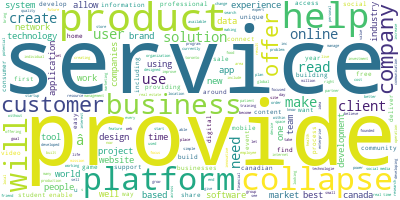

In [14]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['description'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Pre processamento

In [15]:
data = df.description.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['fitin', 'latest', 'fit', 'tech', 'platform', 'provides', 'professional', 'marketing', 'booking', 'tool', 'gyms', 'studios', 'independent', 'instructors', 'personal', 'trainers', 'customers', 'want', 'combination', 'trip', 'advisor', 'groupon', 'read', 'reviews', 'check', 'schedules', 'browse', 'photos', 'booka', 'one']


### Criar Corpus

In [16]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


### Treinar modelo

In [17]:
import gensim
from pprint import pprint
# number of topics
num_topics = 50 
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(33,
  '0.011*"company" + 0.005*"products" + 0.005*"online" + 0.004*"collapse" + '
  '0.004*"based" + 0.004*"solutions" + 0.004*"exploration" + '
  '0.004*"experience" + 0.004*"people" + 0.003*"product"'),
 (29,
  '0.007*"online" + 0.005*"platform" + 0.004*"products" + 0.004*"social" + '
  '0.004*"company" + 0.004*"based" + 0.004*"new" + 0.004*"one" + 0.004*"time" '
  '+ 0.004*"also"'),
 (0,
  '0.007*"technology" + 0.007*"company" + 0.006*"business" + 0.005*"based" + '
  '0.005*"time" + 0.005*"customers" + 0.004*"read" + 0.004*"canada" + '
  '0.004*"solutions" + 0.003*"management"'),
 (40,
  '0.005*"services" + 0.004*"read" + 0.004*"world" + 0.004*"online" + '
  '0.004*"platform" + 0.003*"also" + 0.003*"help" + 0.003*"time" + '
  '0.003*"people" + 0.003*"design"'),
 (41,
  '0.007*"company" + 0.005*"platform" + 0.004*"time" + 0.004*"business" + '
  '0.004*"services" + 0.004*"canada" + 0.004*"way" + 0.004*"based" + '
  '0.003*"products" + 0.003*"software"'),
 (28,
  '0.007*"company" + 0

### Criar visualização

In [18]:
import os
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11     0.008322  0.017812       1        1  3.695178
48     0.014036  0.017174       2        1  3.684556
49    -0.029099  0.016462       3        1  3.657072
46     0.019377  0.012641       4        1  3.263062
10    -0.012349  0.022846       5        1  3.219277
44     0.025904  0.019146       6        1  3.034719
26     0.004363  0.001897       7        1  2.861588
16     0.018013  0.013911       8        1  2.695789
33    -0.029965  0.012906       9        1  2.603435
1      0.017739  0.009048      10        1  2.587284
17    -0.006725  0.015629      11        1  2.548944
2     -0.002045  0.011813      12        1  2.467937
35     0.014282  0.003173      13        1  2.424920
34     0.028806  0.002815      14        1  2.396337
13    -0.087402 -0.016336      15        1  2.292863
39    -0.033513  0.009785      16        1  2.271014
9     -0.057992  0.019317      17        1  2.248941
45     0.009745  0.011439      18        1  2.248117
20     0.016517  0.014580      19        1  2.240483
31     0.015705  0.009780      20        1  2.215555
43     0.026382  0.010448      21        1  2.100060
15    -0.019766  0.010754      22        1  1.934104
19     0.032463  0.008450      23        1  1.921355
47    -0.032250  0.018597      24        1  1.900225
8      0.030161  0.001465      25        1  1.892205
21    -0.009199  0.002926      26        1  1.829044
3     -0.028686  0.008536      27        1  1.803292
0     -0.012474  0.003229      28        1  1.765100
7     -0.000716  0.014964      29        1  1.764251
40     0.023536  0.001488      30        1  1.747395
29     0.010843  0.012509      31        1  1.686673
24    -0.006553  0.005999      32        1  1.643625
41     0.003761  0.001502      33        1  1.619431
28    -0.009364  0.016144      34        1  1.617368
27     0.032073 -0.029876      35        1  1.447884
14    -0.043823  0.002900      36        1  1.408692
18    -0.039786 -0.007689      37        1  1.395183
42     0.016966  0.005352      38        1  1.369247
4     -0.004695 -0.002708      39        1  1.356080
5      0.022121 -0.008497      40        1  1.334739
23     0.034723 -0.008042      41        1  1.325879
38     0.012302 -0.004865      42        1  1.296252
12     0.001316 -0.003651      43        1  1.276068
22    -0.008893 -0.062732      44        1  1.215047
6     -0.021522 -0.046106      45        1  1.213062
36     0.005867 -0.010815      46        1  1.190523
32    -0.014894 -0.070576      47        1  1.132226
37     0.005702 -0.060078      48        1  1.103390
25     0.044500 -0.026235      49        1  1.048085
30     0.016183 -0.009233      50        1  1.006441, topic_info=             Term         Freq        Total Category  logprob  loglift
141      services  3585.000000  3585.000000  Default  30.0000  30.0000
506       company  5499.000000  5499.000000  Default  29.0000  29.0000
2761  exploration  1601.000000  1601.000000  Default  28.0000  28.0000
7105         gold  1377.000000  1377.000000  Default  27.0000  27.0000
364        online  2762.000000  2762.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
141      services    22.645252  3585.403937  Topic50  -5.9670  -0.4659
1057         team    19.204662  1802.974374  Topic50  -6.1318   0.0567
283          real    19.036744  1870.883420  Topic50  -6.1406   0.0110
332      business    21.540619  3694.114993  Topic50  -6.0170  -0.5458
55       provides    19.036571  2015.942627  Topic50  -6.1406  -0.0637

[3913 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
10647      1  0.031474        aa
10647      3  0.031474        aa
10647      4  0.031474        aa
10647      5  0.031474        aa
10647      7  0.031474        aa
...      ...       ...       ...
29926     38  0.748382   zoweetv
11973     19  

#### Obs a visualização estára em um arquivo html. Basta abri-lo em um navegador

### Procurar tópicos relacionados a água
Configurar topic_prob conforme o contexto

In [19]:
df

,name,description,employees,city,subcountry,lat,lng
0,fitin,"""fitin is the latest fit tech platform that pr...",1.0,toronto,ontario,43.70011,-79.416300
1,quinditech,"""our services include independent & collaborat...",10.0,montreal,quebec,45.50884,-73.587810
2,botfirst,"""chatlanding is a digital chatbot platform whe...",1.0,toronto,ontario,43.70011,-79.416300
3,bravver,ai-powered army of health professionals in you...,1.0,quebec,quebec,46.82596,-71.235223
4,stylify,"""stylify is a mobile platform that connects pe...",1.0,toronto,ontario,43.70011,-79.416300
...,...,...,...,...,...,...,...
21137,nesscap energy,"""nesscap manufactures industry leading ultraca...",0.0,toronto,ontario,43.70011,-79.416300
21138,eestor corporation,eestor corporation's (the â€œcompanyâ€) missi...,0.0,toronto,ontario,43.70011,-79.416300
21140,h2o innovation,"""h2o innovation is known for its state of the ...",50.0,toronto,ontario,43.70011,-79.416300
21141,ovivo,"""ovivo is a world leader in equipment and solu...",500.0,toronto,ontario,43.70011,-79.416300


In [33]:
water_topics = []
for topic_id in range(num_topics):
    topic_terms = lda_model.get_topic_terms(topic_id, topn=50)
    topic_keywords = [lda_model.id2word[term_id] for term_id, _ in topic_terms]
    if 'water' in topic_keywords:
        water_topics.append(topic_id)
        print(f"Topic {topic_id}: {', '.join(topic_keywords)}")


Topic 12: services, service, company, world, canada, data, collapse, customers, provide, industry, well, real, mobile, technology, one, new, based, provides, create, business, products, also, estate, people, inc, platform, application, time, online, us, product, development, social, private, free, market, web, every, offers, providing, full, first, support, content, offer, used, water, make, process, access


In [34]:

water_topic_indices = []

for doc_id, doc_topics in enumerate(lda_model.get_document_topics(corpus)):
    for topic_num, topic_prob in doc_topics:
        if topic_num in water_topics and topic_prob > 0.1:  # Adjust the threshold as needed
            water_topic_indices.append(doc_id)


dfwater = df.iloc[water_topic_indices,:]
dfother= df.iloc[[i for i in range(len(df)) if i not in water_topic_indices],:]

In [20]:
num_topics = 50  
dfwater, dfother = search_topic(lda_model, corpus,  df, num_topics)

### Análise exploratória

In [36]:
dfwater.describe()

,employees,lat,lng
count,430.000000,430.000000,430.000000
mean,11.362791,46.197038,-92.578596
std,76.886187,3.082376,20.199638
min,0.000000,42.859860,-126.670080
25%,0.000000,43.700110,-114.085290
50%,1.000000,43.733460,-79.416300
75%,1.000000,49.249660,-79.416300
max,1000.000000,55.166670,-52.709310


In [37]:
dfother.describe()

,employees,lat,lng
count,19691.000000,19691.000000,19691.000000
mean,20.082220,45.928923,-125.808022
std,208.322962,2.886139,1857.767222
min,0.000000,42.050090,-113802.000000
25%,0.000000,43.700110,-114.085290
50%,1.000000,43.700110,-79.416300
75%,1.000000,49.249660,-79.416300
max,5000.000000,62.454110,-52.709310


In [24]:
import plotly.express as px

In [38]:
dfhist = pd.concat((dfwater.assign(subject = ['water']*len(dfwater)),
dfother.assign(subject = ['other']*len(dfother))
), 
)

### Número de empregados

In [26]:
fig= px.histogram(dfhist[dfhist['employees']< 100], x = 'employees', color = 'subject')
fig.show()

In [39]:
fig= px.histogram(dfhist[dfhist['employees']< 100], x = 'employees', color = 'subject')
fig.show()

Esse resultado deve ser analisado mais a fundo. Parece que os dados foram arredondados.

### Localização

In [40]:
# x and y given as array_like objects
fig = px.scatter(x=dfwater['lat'], y = dfwater['lng'])
fig.show()

In [41]:
# x and y given as array_like objects
fig = px.scatter(x=dfother['lat'], y = dfother['lng'])
fig.show()

In [42]:
print(f'observamos que as empresas estão em longitudes muito próximas variando em {np.std(dfwater["lng"]):.2f} para o tópico água e {np.std(dfother["lng"]):.2f} para o restante)')

observamos que as empresas estão em longitudes muito próximas variando em 20.18 para o tópico água e 1857.72 para o restante)


###  Top cidades com empresas relacionads ao tópico

In [43]:
dfwater['city'].value_counts()

city
toronto           197
vancouver          77
calgary            43
montreal           27
ottawa             11
waterloo            7
edmonton            7
victoria            6
north york          5
kelowna             4
halifax             4
fredericton         3
quebec              3
milton              2
markham             2
grande prairie      2
kitchener           2
abbotsford          2
regina              2
brampton            1
sydney              1
sundre              1
winnipeg            1
st. john's          1
campbell river      1
mississauga         1
london              1
thunder bay         1
guelph              1
richmond            1
moncton             1
longueuil           1
orangeville         1
tillsonburg         1
sherwood park       1
oshawa              1
kimberley           1
woodstock           1
sherbrooke          1
burlington          1
parksville          1
trois-rivieres      1
houston             1
Name: count, dtype: int64